<a href="https://colab.research.google.com/github/AlexeyTri/MLSeminars/blob/main/MLHSE/Seminar11_How_HDBSCAN_Worksipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

min_samples - K nearest neibors, чем выше К, тем более сглаженные данные, то есть низкие К увеличивают шум и разброс дисперсии



min_cluster_size - dictates the maximum size of a "bump" before it is considerer a peak. Smoothing the estimated PDF so that the true peaks of the distributions become promunent. Убираем лишнюю дисперсию прунингом

PIPLINE:

1. compute the core distance per points
2. use the mutual_reachability(a, b) as a distance metric for each a, b
3. construct a minimum spanning tree
4. prune the tree
5. choise the clusters using "excess of mass"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
from sklearn.datasets import data
import seaborn as sns
%matplotlib inline
sns.set_style('white')
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha': 0.5, 's': 80,'linewidths':0}

In [3]:
import sklearn.datasets as data

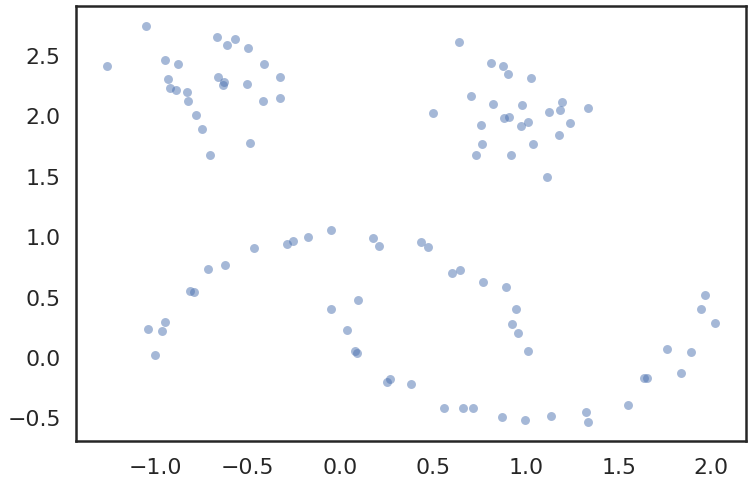

In [6]:
plt.figure(figsize=(12,8))

moons, _ = data.make_moons(n_samples=50, noise=0.05)
bools, _ = data.make_blobs(n_samples=50, centers=[(-0.75,2.25),(1.0,2.0)], cluster_std=0.25)
test_data = np.vstack([moons, bools])
plt.scatter(test_data.T[0], test_data.T[1], color='b', **plot_kwds)

In [7]:
!pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 37.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp38-cp38-linux_x86_64.whl size=3773979 sha256=ee97fc712bd2e2568e17890bcf16df9197910da1979fb277ce5984833ef10c99
  Stored in directory: /root/.cache/pip/wheels/76/06/48/527e038689c581cc9e519c73840efdc7473805149e55bd7ffd
Successfully built hdbscan


In [8]:
import hdbscan

In [9]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusterer.fit(test_data)

HDBSCAN(gen_min_span_tree=True)

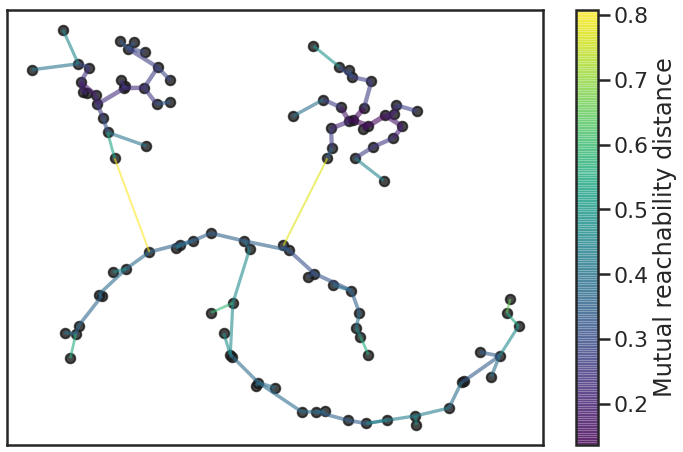

In [10]:
plt.figure(figsize=(12,8))
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=90,
                                      edge_linewidth=2)

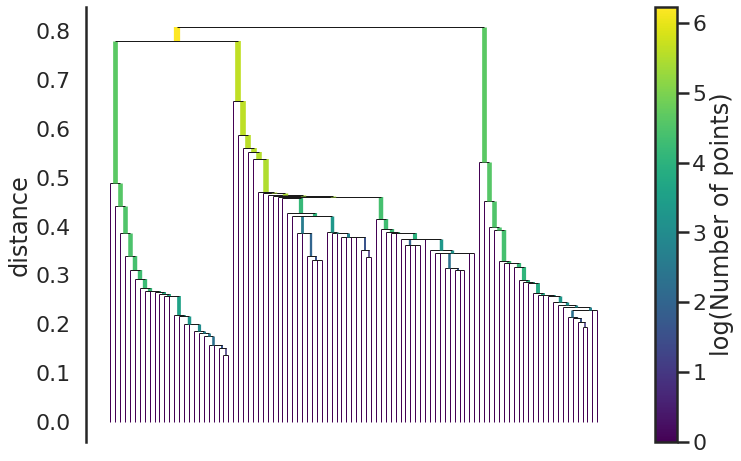

In [11]:
plt.figure(figsize=(12,8))

clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

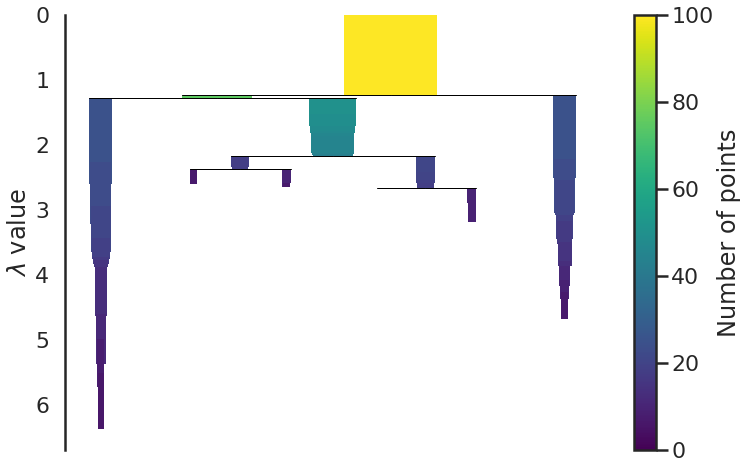

In [12]:
plt.figure(figsize=(12,8))

clusterer.condensed_tree_.plot()

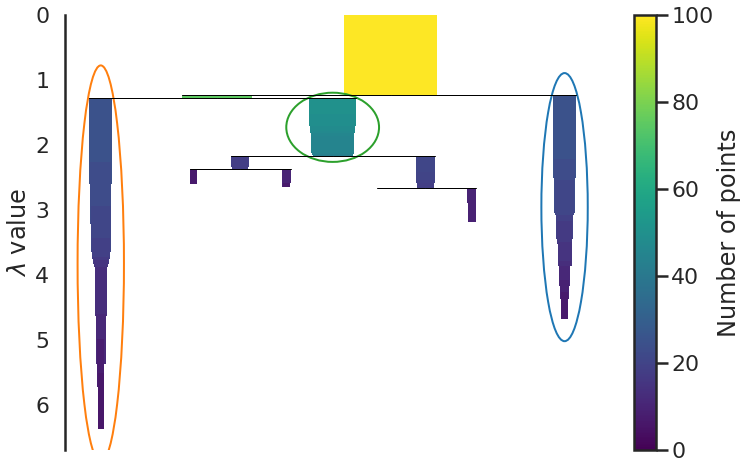

In [13]:
plt.figure(figsize=(12,8))

clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

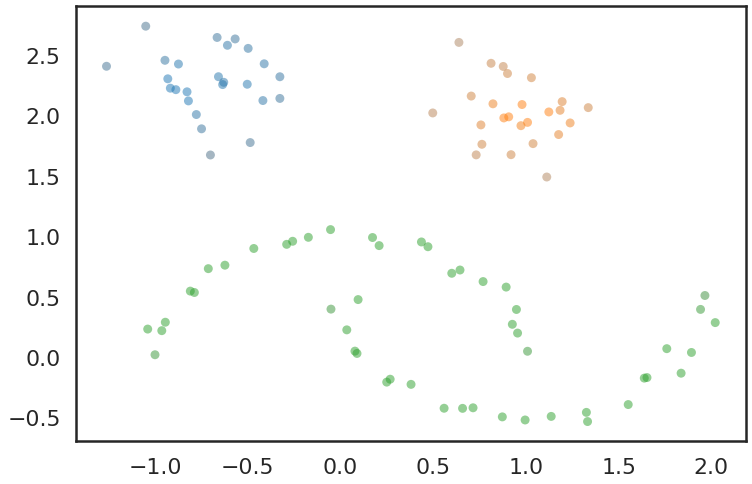

In [14]:
plt.figure(figsize=(12,8))

palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat) 
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in 
                  zip(clusterer.labels_, clusterer.probabilities_)]
plt.scatter(test_data.T[0], test_data.T[1], c=cluster_colors, **plot_kwds)

Сравнение с DBSCAN

In [28]:
from google.colab import files

with open('clusterable_data (1).npy', 'w') as f:
  f.write('some content')

files.download('clusterable_data (1).npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
file.open('clusterable_data (1).npy')

NameError: ignored

In [31]:
with f as file.open('clusterable_data (1).npy'):
  foo = f.readlines()
test_data = np.load(foo)

SyntaxError: ignored

In [30]:
test_data = np.load('clusterable_data (1).npy', allow_pickle=True)

OSError: ignored